# HW2_B0829034

## Q: How to increase accuracy ?

### What I changed 
### ．add hidden layer
### ．change the units(neurons) in the layer
### ．change activation function
### ．change optimizer and set the learning rate
### ．increase epochs
### ．increase batch size

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist #28*28 images of hand-written digits 0-9
(train_images, train_labels),(test_images, test_labels)= mnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0
    0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0   0   0   0   0   

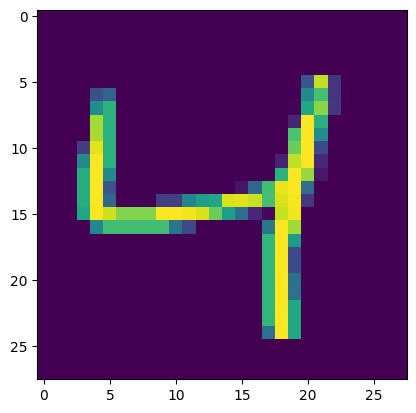

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_images[2])
print(train_images[2])
#color from 0-255

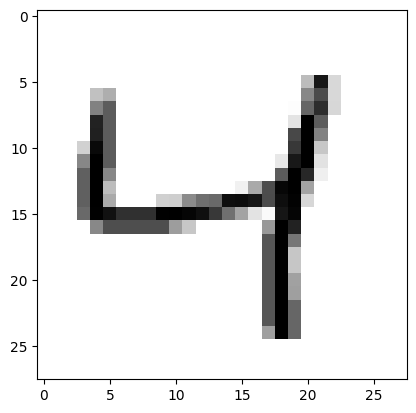

In [8]:
# binary, single color
plt.imshow(train_images[2], cmap = plt.cm.binary)

In [9]:
# Normalization(scale the data) to improve performance
# Normalization is a rescaling of the data from the original range
#so that all values are within the range of 0 and 1

# re-defined train_images and test_images
retrain_images = tf.keras.utils.normalize(train_images, axis=1)
retest_images = tf.keras.utils.normalize(test_images, axis=1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

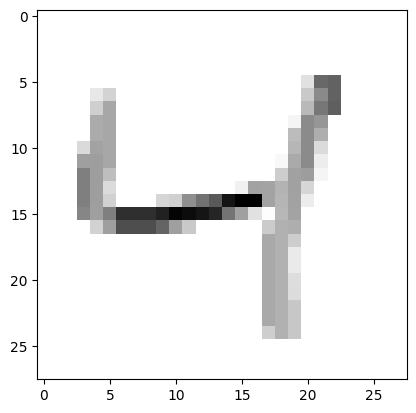

In [10]:
# binary, single color
plt.imshow(retrain_images[2], cmap = plt.cm.binary)
print(retrain_images[2])
#get a little lighter and the value within the range of 0 and 1

In [11]:
import keras

In [63]:
# build the model

# model type is sequentail (linear layering)
# Output layer is number of classifications in the case
model = keras.Sequential([
    #keras.Input(28*28,1),  #first layer is input layer, images is 28*28, then flat
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
    ])

opt = keras.optimizers.Adam(learning_rate=0.001)
# define training parameters
model.compile(
    optimizer=opt,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

### train set achieve 100% accuracy

In [66]:
# train model
model.fit(retrain_images, train_labels, 
          epochs= 15, 
          batch_size= 128)

Epoch 1/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0089 - accuracy: 0.9970
Epoch 2/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0062 - accuracy: 0.9978
Epoch 3/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0037 - accuracy: 0.9987
Epoch 4/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0012 - accuracy: 0.9997
Epoch 5/15
469/469 [==============================] - 3s 5ms/step - loss: 0.0108 - accuracy: 0.9963
Epoch 6/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0065 - accuracy: 0.9978
Epoch 7/15
469/469 [==============================] - 3s 6ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 8/15
469/469 [==============================] - 3s 6ms/step - loss: 2.2146e-04 - accuracy: 1.0000
Epoch 9/15
469/469 [==============================] - 3s 6ms/step - loss: 5.9458e-05 - accuracy: 1.0000
Epoch 10/15
469/469 [==============================] - 3s 6ms/step - loss: 3.8071e-05 - accu

### test set achieve 98% accuracy

In [67]:
# calculate validation loss and accuracy
# accuracy will little less than the last epoch in training
model.evaluate(retest_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1176 - accuracy: 0.9806


[0.11757747828960419, 0.9805999994277954]

In [68]:
#evaluate the model
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 512)               401920    
                                                                 
 dense_49 (Dense)            (None, 128)               65664     
                                                                 
 dense_50 (Dense)            (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


# Prediction

In [69]:
predictions = model.predict([test_images])

313/313 [==============================] - 1s 2ms/step


In [70]:
import numpy as np
print(np.argmax(predictions[0]))

7


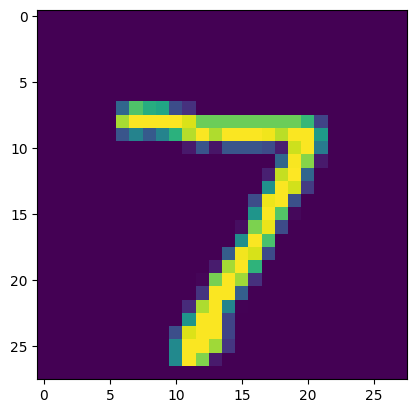

In [71]:
plt.imshow(test_images[0])
plt.show()

# packages needed

In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
